In [46]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import math

import re

from sklearn.utils import shuffle
from sklearn.cluster import KMeans

## Aigua

In [4]:
games = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Aigua/aiguadebarri_games.csv')
participants = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Aigua/aiguadebarri_participants.csv')
user_evo_aigua = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Aigua/aiguadebarri_participants_contributions.csv')

## Vila

In [5]:
partida = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Viladecans/partida.csv')
ronda = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Viladecans/ronda.csv')
user_vila = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Viladecans/user.csv')
user_ronda = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Viladecans/userronda.csv')

## Clima

In [56]:
round_cccb = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Clima/round_CCCB.csv')
round_ciutadella = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Clima/round_ciutadella.csv')
user_cccb = pd.read_excel('../../TfG/Data/Clima/user_CCCB_excel.xlsx', header=1)
user_round_ciutadella = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Clima/userround_ciutadella.csv')
user_round_cccb = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Clima/userround_CCCB.csv')
# user_ciutadella = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Clima/user_ciutadella.csv')
session_cccb = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Clima/session_CCCB.csv')
session_ciutadella = pd.read_csv('/Users/tonidomenech/Desktop/TfG/Data/Clima/session_ciutadella.csv')

# Feature Engineering

In [8]:
def contributions_separation(string):
    return [int(i) for i in re.findall('[0-9]+', string)]

#### Aigua

In [33]:
array_tank = user_evo_aigua['contribution'].apply(contributions_separation)

# Introduction into our contributions dataframe.
for j in range(0, len(array_tank)):
    for i in range(1, 11):
        user_evo_aigua.loc[[j],['c'+str(i)]] = array_tank[j][i-1]
        
user_evo_aigua.drop(labels='contribution', axis=1, inplace=True)

In [35]:
len(user_evo_aigua['c1'])

126

#### Viladecans

In [39]:
# Trying to grab all the data in one.

user_evo = {}
for i in range(1, 182):
    if (len(np.asarray(user_ronda[user_ronda['user_id']==i]['option_selected'])) == 10):
        user_evo['user%s' % i] = np.asarray(user_ronda[user_ronda['user_id']==i]['option_selected'])
    else:
        user_evo['user%s' % i] = np.zeros(10)
        #print(i)
        #pass
        
    # You have to equalize the length of all the vectors to put into a dataframe.
user_evo = pd.DataFrame.from_dict(user_evo, columns=['c1','c2','c3','c4','c5','c6','c7','c8','c9','c10'], orient='index')

In [40]:
len(user_evo['c1'])

181

#### Clima

In [74]:
complicated_numbers = []
for i in range(1, 211):
    if(len(user_round_cccb[user_round_cccb['user_id']==i]['option_selected'])==0):
        complicated_numbers.append(i)

In [90]:

user_evo_clima = {}
for i in range(1, 211):
    try:
        vec_i = np.asarray(user_round_cccb[user_round_cccb['user_id']==i]['option_selected'])
        game = np.asarray(user_round_cccb[user_round_cccb['user_id']==i]['round_id'])[0]//10
        a = np.asarray(np.append(vec_i, game))
        user_evo_clima['user%s' % i] = a

        # You have to equalize the length of all the vectors to put into a dataframe.
    except:
        pass
user_evo_clima = pd.DataFrame.from_dict(user_evo_clima, columns=['c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','game_id'], orient='index')

In [91]:
len(user_evo_clima['c1'])

192

# Mutual Information

In [43]:
# THE ULTIMATE MUTUAL INFOMRATION (FOR 3 VALUES) FUNCTION.

def mutual_information(dataframe):
    side = dataframe.count()['c1'] + 1
    i = 0
    smi_ver_vila = np.zeros(shape=(side,side))
    for index_1, user_1 in dataframe.iterrows():
        i += 1
        j = 0
        for index_2, user_2 in dataframe.iterrows():
            j += 1
            index_1 = contributions_separation(str(index_1))[0]
            index_2 = contributions_separation(str(index_2))[0]
            x_array = np.asarray(user_1[['c1', 'c2', 'c3','c4', 'c5', 'c6','c7', 'c8', 'c9', 'c10']])
            y_array = np.asarray(user_2[['c1', 'c2', 'c3','c4', 'c5', 'c6','c7', 'c8', 'c9', 'c10']])


            y_prob = []  
            cont_0y = 0
            cont_2y = 0
            cont_4y = 0

            x_prob = []
            cont_0 = 0
            cont_2 = 0
            cont_4 = 0

            # Y PROBABILITIES
            for index, num in enumerate(y_array):
                # Pair of Study Catched


                # Separate Probabilities:


                if num == 0:
                    cont_0y += 1
                elif num == 2:
                    cont_2y += 1
                else:
                    cont_4y += 1
            y_prob.append(cont_0y/10)
            y_prob.append(cont_2y/10)
            y_prob.append(cont_4y/10)




            # X PROBABILITIES
            for index, num in enumerate(x_array):
                # Pair of Study Catched
                pair = [num, y_array[index]]

                # Separate Probabilities:


                if num == 0:
                    cont_0 += 1
                elif num == 2:
                    cont_2 += 1
                else:
                    cont_4 += 1
            x_prob.append(cont_0/10)
            x_prob.append(cont_2/10)
            x_prob.append(cont_4/10)


            # CONDITIONATED PROBABILITY AND MUTUAL INFORMATION    
            mi = 0        # INITIATING THE MUTUAL INFORMATION FOR EACH VALUE
            for index, num in enumerate(x_array):
                # PROBABILITIES
                px = x_prob[int(num)//2]
                py = y_prob[int(y_array[index])//2]



                # Condicionated Probability:
                # It looks that what we have here works. 
                pos_x = []
                for index_x, num_x in enumerate(x_array):

                    if num == num_x:
                        pos_x.append(index_x)
                cont_y = 0
                for pos in pos_x:
                    if y_array[index] == y_array[pos]:
                        cont_y += 1

                p_x_given_y = cont_y/len(pos_x)

                mi = mi + (p_x_given_y*px*math.log(p_x_given_y*px/(px*py),3))

            if mi != None:
                smi_ver_vila[i, j] = mi/10
            else:
                smi_ver_vila[i, j] = 0
    return smi_ver_vila

# THE ULTIMATE MUTUAL INFOMRATION (FOR 3 VALUES) FUNCTION.

def mutual_information_shuffled(dataframe):
    side = dataframe.count()['c1'] + 1
    i = 0
    smi_ver_vila = np.zeros(shape=(side,side))
    for index_1, user_1 in dataframe.iterrows():
        i += 1
        j = 0
        for index_2, user_2 in dataframe.iterrows():
            j += 1
            index_1 = contributions_separation(str(index_1))[0]
            index_2 = contributions_separation(str(index_2))[0]
            x_array = shuffle(np.asarray(user_1[['c1', 'c2', 'c3','c4', 'c5', 'c6','c7', 'c8', 'c9', 'c10']]))
            y_array = shuffle(np.asarray(user_2[['c1', 'c2', 'c3','c4', 'c5', 'c6','c7', 'c8', 'c9', 'c10']]))


            y_prob = []  
            cont_0y = 0
            cont_2y = 0
            cont_4y = 0

            x_prob = []
            cont_0 = 0
            cont_2 = 0
            cont_4 = 0

            # Y PROBABILITIES
            for index, num in enumerate(y_array):
                # Pair of Study Catched


                # Separate Probabilities:


                if num == 0:
                    cont_0y += 1
                elif num == 2:
                    cont_2y += 1
                else:
                    cont_4y += 1
            y_prob.append(cont_0y/10)
            y_prob.append(cont_2y/10)
            y_prob.append(cont_4y/10)




            # X PROBABILITIES
            for index, num in enumerate(x_array):
                # Pair of Study Catched
                pair = [num, y_array[index]]

                # Separate Probabilities:


                if num == 0:
                    cont_0 += 1
                elif num == 2:
                    cont_2 += 1
                else:
                    cont_4 += 1
            x_prob.append(cont_0/10)
            x_prob.append(cont_2/10)
            x_prob.append(cont_4/10)


            # CONDITIONATED PROBABILITY AND MUTUAL INFORMATION    
            mi = 0        # INITIATING THE MUTUAL INFORMATION FOR EACH VALUE
            for index, num in enumerate(x_array):
                # PROBABILITIES
                px = x_prob[int(num)//2]
                py = y_prob[int(y_array[index])//2]



                # Condicionated Probability:
                # It looks that what we have here works. 
                pos_x = []
                for index_x, num_x in enumerate(x_array):

                    if num == num_x:
                        pos_x.append(index_x)
                cont_y = 0
                for pos in pos_x:
                    if y_array[index] == y_array[pos]:
                        cont_y += 1

                p_x_given_y = cont_y/len(pos_x)

                mi = mi + (p_x_given_y*px*math.log(p_x_given_y*px/(px*py),3))

            if mi != None:
                smi_ver_vila[i, j] = mi/10
            else:
                smi_ver_vila[i, j] = 0
    return smi_ver_vila

def mi_masked(natural, shuffled):
    mask = np.zeros(natural.shape)
    
    for i in range(0, natural.shape[0]):
        for j in range(0, natural.shape[1]):
            if((natural[i,j]-shuffled[i,j]) > 0):
                mask[i, j] = 1
    return mask*natural       

In [44]:
mi_clima = mutual_information(user_evo_clima)
mi_vila = mutual_information(user_evo)
mi_aigua = mutual_information(user_evo_aigua)

In [45]:
mi_clima_shuffled = mutual_information_shuffled(user_evo_clima)
mi_aigua_shuffled = mutual_information_shuffled(user_evo_aigua)
mi_vila_shuffled = mutual_information_shuffled(user_evo)

### Total Mutual Information

In [48]:
raw_evo_vila = user_evo[['c1', 'c2', 'c3','c4', 'c5', 'c6','c7', 'c8', 'c9', 'c10']]
raw_evo_clima = user_evo_clima[['c1', 'c2', 'c3','c4', 'c5', 'c6','c7', 'c8', 'c9', 'c10']]
raw_evo_aigua = user_evo_aigua[['c1', 'c2', 'c3','c4', 'c5', 'c6','c7', 'c8', 'c9', 'c10']]

frames = [raw_evo_vila, raw_evo_aigua, raw_evo_clima]

total_evo = pd.concat(frames)

total_evo = total_evo.reset_index()

mi_total = mutual_information(total_evo)
mi_total_shuffled = mutual_information_shuffled(total_evo)

mi_total_def = mi_masked(mi_total, mi_total_shuffled)

In [49]:
np.max(mi_total_def)
mi_total_def_norm = mi_total_def/np.max(mi_total_def)

## Clusteritzation

In [107]:
kmeans = KMeans(n_clusters=8).fit(mi_total_def_norm)
labels = kmeans.labels_

len(labels)

500

#### Vila

In [51]:
user_treated = user_vila[['genere', 'rang_edat', 'nivell_estudis']]

user_treated[['gender', 'age', 'education']] = user_treated[['genere', 'rang_edat', 'nivell_estudis']]

user_treated.drop('genere', axis=1, inplace=True)
user_treated.drop('rang_edat', axis=1, inplace=True)
user_treated.drop('nivell_estudis', axis=1, inplace=True)

/Users/tonidomenech/Desktop/Python/envs/tfg/lib/python3.8/site-packages/pandas-1.3.0.dev0+1028.gbed5ae2c14-py3.8-macosx-10.14.6-arm64.egg/pandas/core/frame.py:3583: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/Users/tonidomenech/Desktop/Python/envs/tfg/lib/python3.8/site-packages/pandas-1.3.0.dev0+1028.gbed5ae2c14-py3.8-macosx-10.14.6-arm64.egg/pandas/core/frame.py:4776: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [53]:
len(user_treated['age'])

181

#### Aigua

In [52]:
participants_treated = participants[['gender', 'age', 'education']]

In [54]:
len(participants_treated['age'])

126

#### Clima

In [57]:
user_cccb_treated = user_cccb[['gender', 'age_range', 'educational_level']]

user_cccb_treated[['age', 'education']] = user_cccb_treated[['age_range', 'educational_level']]

user_cccb_treated.drop('age_range', axis=1, inplace=True)
user_cccb_treated.drop('educational_level', axis=1, inplace=True)

/Users/tonidomenech/Desktop/Python/envs/tfg/lib/python3.8/site-packages/pandas-1.3.0.dev0+1028.gbed5ae2c14-py3.8-macosx-10.14.6-arm64.egg/pandas/core/frame.py:3583: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/Users/tonidomenech/Desktop/Python/envs/tfg/lib/python3.8/site-packages/pandas-1.3.0.dev0+1028.gbed5ae2c14-py3.8-macosx-10.14.6-arm64.egg/pandas/core/frame.py:4776: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [58]:
len(user_cccb_treated['age'])

188

### Joining the Clusters.

There is some kind of error in the data of the clima dataset. So we aren't going to use it for this plots but we will be using it for the mutual information either way

In [205]:
frames = [user_treated, participants_treated]

total_demographic = pd.concat(frames)
total_demographic.reset_index()

total_demographic = total_demographic[['gender', 'age', 'education']]

In [206]:
total_demographic.head()

,gender,age,education
0,F,r6,r2
1,M,r6,r7
2,M,r7,r4
3,F,r7,r2
4,M,r4,r6


In [213]:
total_demographic[['age']].fillna(value='r0', inplace=True)

In [214]:
total_demographic['age'].unique()

array(['r6', 'r7', 'r4', 'r5', 'r1', 'r2', 'r3', 'r8', nan], dtype=object)

/Users/tonidomenech/Desktop/Python/envs/tfg/lib/python3.8/site-packages/pandas-1.3.0.dev0+1028.gbed5ae2c14-py3.8-macosx-10.14.6-arm64.egg/pandas/core/frame.py:3583: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [210]:
total_demographic[total_demographic['gender'].isna()]

,gender,age,education
18,NaN,r1,r2
21,NaN,r8,r6
29,NaN,r8,r6
111,NaN,NaN,NaN
112,NaN,r1,r2


In [173]:
labels = labels[:307]

In [174]:
total_demographic['cluster'] = labels

ConversionError: Failed to convert value(s) to axis units: 0      r2
1      r7
2      r4
3      r2
4      r6
       ..
121    r2
122    r2
123    r3
124    r3
125    r1
Name: y, Length: 307, dtype: object

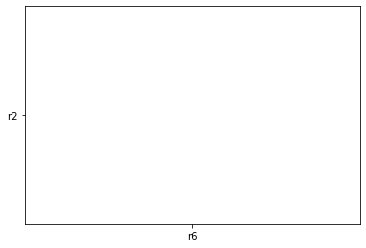

In [175]:
sns.histplot(total_demographic, x='age', y='education')